<a href="https://colab.research.google.com/github/biggymart/colab/blob/main/nms_raccoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[x] 6 initial bounding boxes
바운딩 박스들의 좌표들은 다음과 같습니다
x1 : [ 81  93 105  81  93  93]
y1 : [ 88  88  88 100 100 112]
x2 : [522 534 546 522 534 534]
y2 : [408 408 408 420 420 436]

각 박스의 넓이는 다음과 같습니다
area : [141882 141882 141882 141882 141882 143650]

박스를 우측 하단의 y 좌표를 기준으로 정렬하면 다음과 같습니다 (숫자가 클수록 우측 하단에 가까움)
idxs : [0 1 2 3 4 5]
last : 5
i : 5
pick : [5]
suppress : [5]

이번에 비교할 박스는 0 번째 박스입니다
j : 0
마지막에 있는 박스와 0 번째 박스를 비교했더니
우측 상단 x 좌표 중 더 큰 값은
xx1 : 93
우측 상단 y 좌표 중 더 큰 값은
yy1 : 112
좌측 하단 x 좌표 중 더 작은 값은
xx2 : 522
좌측 하단 y 좌표 중 더 작은 값은
yy2 : 408
두 박스의 겹치는 부분의 너비와 높이는 다음과 같습니다
w : 430
h : 297
따라서 계산되는 겹치는 영역은 다음과 같습니다
overlap : 0.9001141793885059
만약 overlap이 overlapThresh보다 크다면 현재 박스의 원래 인덱스(pos)를 suppress 리스트에 첨부하세요
overlapThresh : 0.3
pos : 0
suppress : [5, 0]

이번에 비교할 박스는 1 번째 박스입니다
j : 1
마지막에 있는 박스와 1 번째 박스를 비교했더니
우측 상단 x 좌표 중 더 큰 값은
xx1 : 93
우측 상단 y 좌표 중 더 큰 값은
yy1 : 112
좌측 하단 x 좌표 중 더 작은 값은
xx2 : 534
좌측 하단 y 좌표 중 더 작은 값은
yy2 : 408
두 박스의 겹치는 부분의 너비와 높이는 다음과 같습니다
w : 442
h : 297
따라서 계산되는 겹

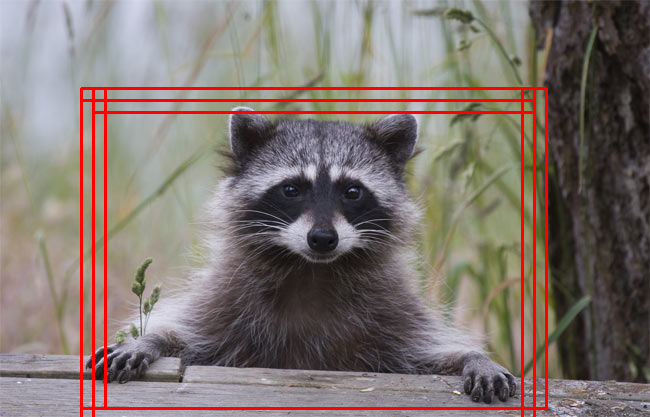

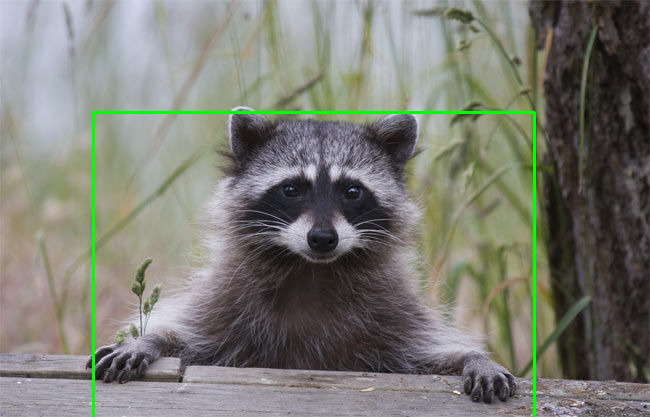

In [27]:
"""
Motivation: 어떻게 하면 한 객체에 한 바운딩 박스만 남게 할 수 있을까?
Solution: 일단 y 기준으로 우측 하단에 가까운 한 박스를 잡고 내가 잡은 기준(threshold)
  이상으로 겹치면 동일한 객체에 대해서 그린 바운딩 박스라고 간주하고, 기준이 아닌 다른 박스를
  suppress되도록 한다.
"""

from google.colab.patches import cv2_imshow
import numpy as np
import cv2

def non_max_suppression_slow(boxes, overlapThresh):
  # if there are no boxes, return an empty list
  if len(boxes) == 0:
    print("There is no box in boxes")
    return []
        
  # initialize the list of picked indexes
  pick = []

  # grab the coordinates of the bounding boxes
  print("바운딩 박스들의 좌표들은 다음과 같습니다")
  x1 = boxes[:,0]
  print("x1 :", x1)
  y1 = boxes[:,1]
  print("y1 :", y1)
  x2 = boxes[:,2]
  print("x2 :", x2)
  y2 = boxes[:,3]
  print("y2 :", y2)

	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
  area = (x2 - x1 + 1) * (y2 - y1 + 1)
  print("\n각 박스의 넓이는 다음과 같습니다")
  print("area :", area)
  idxs = np.argsort(y2)
  print("\n박스를 우측 하단의 y 좌표를 기준으로 정렬하면 다음과 같습니다 (숫자가 클수록 우측 하단에 가까움)")
  print("idxs :", idxs)
 
	# keep looping while some indexes still remain in the indexes
	# list
  while len(idxs) > 0:
		# grab the last index in the indexes list, add the index
		# value to the list of picked indexes, then initialize
		# the suppression list (i.e. indexes that will be deleted)
		# using the last index
    last = len(idxs) - 1
    print("last :", last)
    i = idxs[last]
    print("i :", i)
    pick.append(i)
    print("pick :", pick)
    suppress = [last]
    print("suppress :", suppress)
        
		# loop over all indexes in the indexes list
    for pos in range(0, last):
			# grab the current index
      j = idxs[pos]
      print("\n이번에 비교할 박스는 %d 번째 박스입니다" %j)
      print("j :", j)
            
			# find the largest (x, y) coordinates for the start of
			# the bounding box and the smallest (x, y) coordinates
			# for the end of the bounding box
      print("마지막에 있는 박스와 %d 번째 박스를 비교했더니" %j)
      xx1 = max(x1[i], x1[j])
      print("우측 상단 x 좌표 중 더 큰 값은")
      print("xx1 :", xx1)
      yy1 = max(y1[i], y1[j])
      print("우측 상단 y 좌표 중 더 큰 값은")
      print("yy1 :", yy1)
      xx2 = min(x2[i], x2[j])
      print("좌측 하단 x 좌표 중 더 작은 값은")
      print("xx2 :", xx2)
      yy2 = min(y2[i], y2[j])
      print("좌측 하단 y 좌표 중 더 작은 값은")
      print("yy2 :", yy2)
            
			# compute the width and height of the bounding box
      w = max(0, xx2 - xx1 + 1)
      h = max(0, yy2 - yy1 + 1)
      print("두 박스의 겹치는 부분의 너비와 높이는 다음과 같습니다")
      print("w :", w)
      print("h :", h)
            
			# compute the ratio of overlap between the computed
			# bounding box and the bounding box in the area list
      overlap = float(w * h) / area[j]
      print("따라서 계산되는 겹치는 영역은 다음과 같습니다")
      print("overlap :", overlap)
            
			# if there is sufficient overlap, suppress the
			# current bounding box
      if overlap > overlapThresh:
        print("만약 overlap이 overlapThresh보다 크다면 현재 박스의 원래 인덱스(pos)를 suppress 리스트에 첨부하세요")
        print("overlapThresh :", overlapThresh)
        suppress.append(pos)
        print("pos :", pos)
        print("suppress :", suppress)
                
		# delete all indexes from the index list that are in the
		# suppression list
    print("\n최종 suppress 리스트는 :", suppress)
    print("이제 supress 리스트에 있다면 idxs에서 삭제해줄 겁니다")
    print("삭제 전 idxs:", idxs)
    idxs = np.delete(idxs, suppress)
    print("삭제 후 idxs :", idxs)
        
	# return only the bounding boxes that were picked
  print("boxes[pick] :", boxes[pick])
  return boxes[pick]

##############################################################
# construct a list containing the images that will be examined
# along with their respective bounding boxes
images = [
	("/content/raccoon-1.jpg", np.array([
	(81, 88, 522, 408),
    (93, 88, 534, 408),
    (105, 88, 546, 408),
    (81, 100, 522, 420),
    (93, 100, 534, 420),
    (93, 112, 534, 436)]))
]
    
# loop over the images
for (imagePath, boundingBoxes) in images:
	# load the image and clone it
	print("[x] %d initial bounding boxes" % (len(boundingBoxes)))
	image = cv2.imread(imagePath)
	orig = image.copy()
    
	# loop over the bounding boxes for each image and draw them
	for (startX, startY, endX, endY) in boundingBoxes:
		cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 0, 255), 2)
        
	# perform non-maximum suppression on the bounding boxes
	pick = non_max_suppression_slow(boundingBoxes, 0.3)
	print("[x] after applying non-maximum, %d bounding boxes" % (len(pick)))
    
	# loop over the picked bounding boxes and draw them
	for (startX, startY, endX, endY) in pick:
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        
	# display the images
	cv2_imshow(orig)
	cv2_imshow(image)